# Оптимизация в Python: глобальная оптимизация и оптимизация негладкой функции
------------------
https://www.coursera.org/learn/mathematics-and-python/programming/ETQfh/optimizatsiia-v-python-ghlobal-naia-optimizatsiia-i-optimizatsiia-nieghladkoi

In [1]:
import sys
import math
import pandas as pd
import numpy as np
import doctest
print('pd: {}, np: {}, python: {}'.format(
    pd.__version__, np.__version__, sys.version[:6]))

pd: 0.19.2, np: 1.12.0, python: 3.6.0 


In [2]:
import matplotlib
matplotlib.use('svg')
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
%matplotlib inline

pylab.rcParams['figure.figsize'] = 12.0, 7.0
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['font.family'] = 'serif'

In [3]:
def f(x):
    """
    >>> f(0)
    5.0
    """
    return math.sin(x / 5) * math.exp(x / 10) + 5 * math.exp(-x / 2)

In [4]:
doctest.testmod()

TestResults(failed=0, attempted=1)

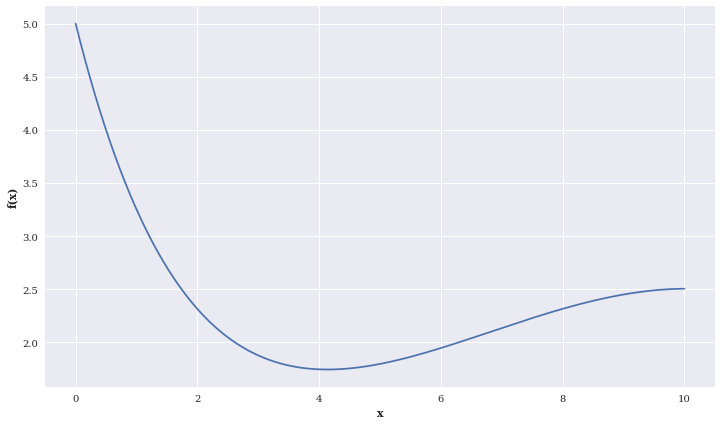

In [5]:
x = np.linspace(0, 10, num=1000)

y = [f(xi) for xi in x]

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')

# Задача 1. Минимизация гладкой функции
------------------------------

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize

In [6]:
import scipy

In [7]:
opt_res = scipy.optimize.minimize(f, 2, method='BFGS')
print(opt_res)
xmin = opt_res.x[0]
ymin = f(xmin)
a1 = '{:.2f}'.format(ymin)
a1

      fun: 1.7452682903449388
 hess_inv: array([[ 5.98752437]])
      jac: array([ -2.07126141e-06])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([ 4.13627618])


'1.75'

In [8]:
opt_res = scipy.optimize.minimize(f, 30, method='BFGS')
print(opt_res)
xmin = opt_res.x[0]
ymin = f(xmin)
a2 = '{:.2f}'.format(ymin)
a2

      fun: -11.898894665981285
 hess_inv: array([[ 1.67932484]])
      jac: array([  2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([ 25.88019339])


'-11.90'

In [9]:
with open('ans1.txt', 'w') as fp:
    fp.write(a1 + " " + a2)

# Задача 2. Глобальная оптимизация
---------------
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html#scipy.optimize.differential_evolution


In [10]:
opt_res = scipy.optimize.differential_evolution(f, [(1, 30)])
print(opt_res)
xmin = opt_res.x[0]
ymin = f(xmin)
a2 = '{:.2f}'.format(ymin)
a2

     fun: -11.8988946659806
     jac: array([  1.06581410e-06])
 message: 'Optimization terminated successfully.'
    nfev: 96
     nit: 5
 success: True
       x: array([ 25.88019459])


'-11.90'

In [11]:
with open('ans2.txt', 'w') as fp:
    fp.write(a2)

# Задача 3. Минимизация негладкой функции
-------------------

In [12]:
def f1(x):
    return int(f(x))

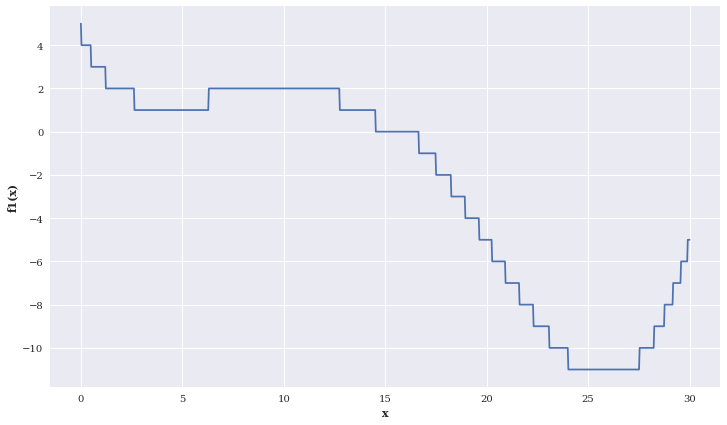

In [13]:
x = np.linspace(0, 30, num=1000)
y = [f1(xi) for xi in x]

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f1(x)')

In [14]:
opt_res = scipy.optimize.minimize(f1, 30, method='BFGS')
print(opt_res)
xmin = opt_res.x[0]
ymin = f1(xmin)
a1 = '{:.2f}'.format(ymin)
a1

      fun: -5
 hess_inv: array([[1]])
      jac: array([ 0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([ 30.])


'-5.00'

In [15]:
opt_res = scipy.optimize.differential_evolution(f1, [(1, 30)])
print(opt_res)
xmin = opt_res.x[0]
ymin = f1(xmin)
a2 = '{:.2f}'.format(ymin)
a2

     fun: -11.0
 message: 'Optimization terminated successfully.'
    nfev: 107
     nit: 6
 success: True
       x: array([ 26.04126249])


'-11.00'

In [16]:
res = a1 + ' ' + a2

In [17]:
with open('ans3.txt', 'w') as fp:
    fp.write(res)